In [113]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import math

In [114]:
df = pd.read_csv('kmean.csv');
df

,x,y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


In [115]:
df.describe()

,x,y
count,8.000000,8.000000
mean,0.185000,0.520000
std,0.076345,0.298424
min,0.080000,0.100000
25%,0.137500,0.275000
50%,0.180000,0.550000
75%,0.242500,0.745000
max,0.300000,0.900000


In [116]:
class Kmeans:
    def __init__(self):
        pass;
    
    def fitPoints(self, x, y):
        self.x = x;
        self.y = y;
        self.clusterofPoint = {};
        self.pointsinCluster1 = [];
        self.pointsinCluster2 = [];

    def formClusters(self, c1, c2):

        prevC1 = c1;
        prevC2 = c2;
        # pointsinCluster1 = []
        # pointsinCluster2 = []
        while True:
            self.pointsinCluster1 = [];
            self.pointsinCluster2 = [];
            for xi, yi in zip(self.x, self.y):
                d1 = (xi-prevC1[0])**2 + (yi-prevC1[1])**2;
                d2 = (xi-prevC2[0])**2 + (yi-prevC2[1])**2;
                if(d1 > d2):
                    self.pointsinCluster2.append([xi, yi]);
                    # self.clusterofPoint[[xi, yi]] = 'cluster1';
                else:
                    self.pointsinCluster1.append([xi, yi]);
                    # self.clusterofPoint[[xi, yi]] = 'cluster2';
            
            xPoints1 = []; yPoints1 = [];
            xPoints2 = []; yPoints2 = [];
            for point in self.pointsinCluster1:
                xPoints1.append(point[0]);
                yPoints1.append(point[1]);
            for point in self.pointsinCluster2:
                xPoints2.append(point[0]);
                yPoints2.append(point[1]);
            newC1 = [ np.mean(xPoints1), np.mean(yPoints1) ];
            newC2 = [ np.mean(xPoints2), np.mean(yPoints2) ];

            if(newC1 == prevC1 and newC2 == prevC2):
                break;
            
            prevC1 = newC1;
            prevC2 = newC2;
        print('New Centroid for Cluster 1 : ', prevC1);
        print('New Centroid for Cluster 2 : ', prevC2);
        
    

    def getCluster(self, point):
        # return self.clusterofPoint[point];
        if point in self.pointsinCluster1:
            return 'cluster1';
        if point in self.pointsinCluster2:
            return 'cluster2';
        print('Form Clusters First');
    

    def getClusterCount(self, cluster):
        pass;
    
    def drawScatterPlot(self):
        xPoints1 = []; yPoints1 = [];
        xPoints2 = []; yPoints2 = [];
        for point in self.pointsinCluster1:
            xPoints1.append(point[0]);
            yPoints1.append(point[1]);
        for point in self.pointsinCluster2:
            xPoints2.append(point[0]);
            yPoints2.append(point[1]);
        plt.figure(figsize=(12, 8));
        plt.scatter(xPoints1, yPoints1, color="blue");
        plt.scatter(xPoints2, yPoints2, color='red');
        plt.show();


In [117]:
kmeans = Kmeans();
kmeans.fitPoints(df['x'], df['y']);

In [118]:
print('Forming Cluster ..... ');
c1 = [0.10, 0.60]
c2 = [0.30, 0.20]
kmeans.formClusters(c1, c2);
print('Cluter Formed');

Forming Cluster ..... 
New Centroid for Cluster 1 :  [0.148, 0.712]
New Centroid for Cluster 2 :  [0.24666666666666667, 0.20000000000000004]
Cluter Formed


In [119]:
p6 = [0.25, 0.50]
p6Cluster = kmeans.getCluster(p6);
print("Point P6 Belongs to : ", p6Cluster)

Point P6 Belongs to :  cluster1


In [120]:
print('Points in CLuster 1 : ');
print(kmeans.pointsinCluster1);

Points in CLuster 1 : 
[[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.25, 0.5]]


In [121]:
print('Points in CLuster 2 : ');
print(kmeans.pointsinCluster2);

Points in CLuster 2 : 
[[0.2, 0.3], [0.24, 0.1], [0.3, 0.2]]


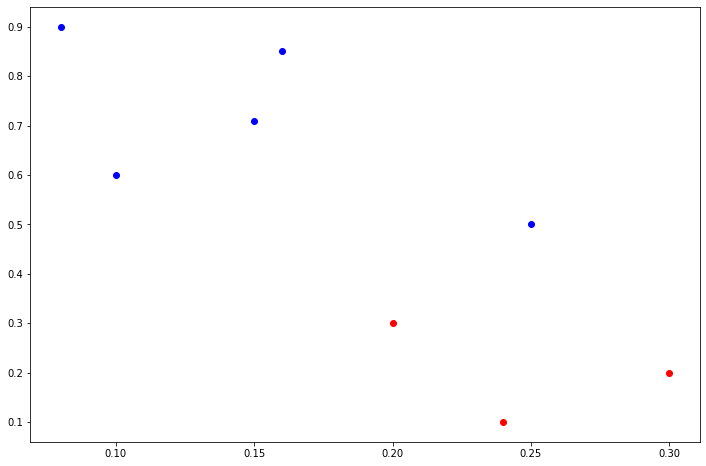

In [122]:
kmeans.drawScatterPlot();